connect to my drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/My_Codes/DeepLearning/ex1_GenderDetection/

/content/drive/MyDrive/My_Codes/DeepLearning/ex1_GenderDetection


# unzip data

In [ ]:
# !tar -xvf dataset/UTKface_inthewild/part1.tar.gz -C dataset
# !tar -xvf dataset/UTKface_inthewild/part2.tar.gz -C dataset
# !tar -xvf dataset/UTKface_inthewild/part3.tar.gz -C dataset

# !tar -xvf UTKFace.tar.gz 
# !tar -xvf dataset2/crop_part1.tar.gz -C dataset2


# load train and test data 

In [ ]:
pip install tqdm

In [ ]:
import os
import numpy as np
import shutil
from tqdm import tqdm, tqdm_notebook

def splitdata(root_dir, src):

  # os.makedirs(root_dir +'/train')
  # os.makedirs(root_dir +'/train/female')
  # os.makedirs(root_dir +'/train/male')
  os.makedirs(root_dir +'/vak')
  os.makedirs(root_dir +'/vak/female')
  os.makedirs(root_dir +'/vak/male')
  # os.makedirs(root_dir +'/test')
  # os.makedirs(root_dir +'/test/female')
  # os.makedirs(root_dir +'/test/male')

  # Creating partitions of the data after shuffeling

  allFileNames = os.listdir(src)
  np.random.shuffle(allFileNames)
  train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                            [int(len(allFileNames)*0.7), int(len(allFileNames)*0.85)])


  train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
  val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
  test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

  print('Total images: ', len(allFileNames))
  print('Training: ', len(train_FileNames))
  print('Validation: ', len(val_FileNames))
  print('Testing: ', len(test_FileNames))

  # Copy-pasting images
  # for name in tqdm_notebook(train_FileNames):
  #   if name.split('/')[1].split('_')[1]=='1':
  #     shutil.copy(name, root_dir +"/train/male")
  #   else:
  #     shutil.copy(name, root_dir +"/train/female")

  for name in tqdm_notebook(val_FileNames):
    if name.split('/')[1].split('_')[1]=='1':
      shutil.copy(name, root_dir +"/vak/male")
    else:
      shutil.copy(name, root_dir +"/vak/female")

  for name in tqdm_notebook(test_FileNames):
    if name.split('/')[1].split('_')[1]=='1':
      shutil.copy(name, root_dir +"/test/male")
    else:
      shutil.copy(name, root_dir +"/test/female")

In [ ]:
# # Creating Train / Val / Test folders (One time use)
# %cd /content/drive/MyDrive/My_Codes/DeepLearning/ex1_GenderDetection/dataset2
# root_dir = 'datasetcroppart1'
# src = "crop_part1" # Folder to copy images from
# splitdata(root_dir=root_dir, src=src)

# %cd /content/drive/MyDrive/My_Codes/DeepLearning/ex1_GenderDetection/dataset
# root_dir = 'dataset1'
# src = "part1" # Folder to copy images from
# # x = os.listdir(src)
# splitdata(root_dir=root_dir, src=src)

In [ ]:
%cd /content/drive/MyDrive/My_Codes/DeepLearning/ex1_GenderDetection/dataset2

/content/drive/MyDrive/My_Codes/DeepLearning/ex1_GenderDetection/dataset2


# create dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
# -------------------------------------
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
%cd /content/drive/MyDrive/My_Codes/DeepLearning/ex1_GenderDetection/dataset/setpart1

/content/drive/MyDrive/My_Codes/DeepLearning/ex1_GenderDetection/dataset/setpart1


In [ ]:
# create generator
datagen = ImageDataGenerator(rescale=1. / 255)
# prepare an iterators for each dataset
IMG_HEIGHT = 128
IMG_WIDTH = 128
train_it = datagen.flow_from_directory('train/', class_mode='binary',target_size=(IMG_HEIGHT, IMG_WIDTH),)
val_it = datagen.flow_from_directory('vak/', class_mode='binary',target_size=(IMG_HEIGHT, IMG_WIDTH),)
test_it = datagen.flow_from_directory('test/', class_mode='binary',target_size=(IMG_HEIGHT, IMG_WIDTH),)
# confirm the iterator works
# batchX, batchy = train_it.next()
# print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Found 16246 images belonging to 2 classes.
Found 3129 images belonging to 2 classes.
Found 3129 images belonging to 2 classes.


In [ ]:
# train set
train_set_x_orig = []
train_set_y = []
# for i in tqdm_notebook(range(train_it.__len__()), desc='train set'):
for i in tqdm_notebook(range(100), desc='train set'):
  batchX, batchy = train_it.next()
  train_set_x_orig.append(batchX)
  train_set_y.append(batchy)
# train_set_x_orig = np.concatenate([train_it.next()[0] for i in tqdm_notebook(range(train_it.__len__()), desc='train x')])
# test set
test_set_x_orig = []
test_set_y = []
# for i in tqdm_notebook(range(test_it.__len__()), desc='test set'):
for i in tqdm_notebook(range(40), desc='test set'):
  batchX, batchy = test_it.next()
  test_set_x_orig.append(batchX)
  test_set_y.append(batchy)
# test_set_x_orig =np.concatenate([test_it.next()[0] for i in tqdm_notebook(range(test_it.__len__()),desc = 'test x')])



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [ ]:
import cv2
# @vectorize(['int64(int64, int64)'], target='cuda')
def create_dataset(img_folder):
  img_data_array=[]
  class_name=[]
  sh = []
  IMG_HEIGHT = 64
  IMG_WIDTH = 64
  i=0
  # for file in tqdm_notebook(os.listdir(os.path.join(img_folder)),desc='loop'):
  for file in tqdm_notebook(os.listdir(os.path.join(img_folder)),desc='loop'):
    i +=1
    image_path= os.path.join(img_folder, file)
    image= cv2.imread( image_path,cv2.COLOR_BGR2RGB)
    # sh.append(image.shape)
    image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
    image=np.array(image)
    image = image.astype('float32')
    image /= 255. 
    img_data_array.append(image)
    class_name.append(1 if file.split('_')[1]=='1'else 0)
    if i == 100:
      break
  return np.array(img_data_array), np.array(class_name,ndmin=2)
# extract the image array and class name
# shape is ((200, 200, 3))

In [ ]:
# %cd /content/drive/MyDrive/My_Codes/DeepLearning/ex1_GenderDetection/dataset
# train_set_x_orig, train_set_y = create_dataset(r'part3')
# # test_set_x_orig, test_set_y = create_dataset(r'dataset1/test')
# classes = np.array(('man' ,'woman'))




In [ ]:
train_set_x_orig = np.concatenate(train_set_x_orig)
train_set_y = np.array(np.concatenate(train_set_y) ,ndmin=2)
train_set_y = train_set_y.astype('int16')
# --------------------------------------------------------
test_set_x_orig_arr = np.concatenate(test_set_x_orig)
test_set_y_arr = np.array(np.concatenate(test_set_y),ndmin=2) 
test_set_y_arr = test_set_y_arr.astype('int16')


['man' 'woman']
[1]
y = [1], it's a 'woman' picture.


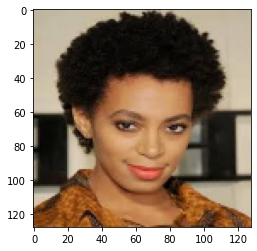

In [ ]:
# Example of a picture
classes = np.array(('man' ,'woman'))
print(classes)
index = 64
plt.imshow(train_set_x_orig[index])
print(train_set_y[:,index])
print ("y = " + str(train_set_y[:,index]) + ", it's a '" + classes[np.squeeze(train_set_y[:,index])] +  "' picture.")

In [ ]:
### Check the shape ### (≈ 3 lines of code)
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig_arr.shape[0]
num_px = train_set_x_orig.shape[1]
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig_arr.shape))
print ("test_set_y shape: " + str(test_set_y_arr.shape))

Number of training examples: m_train = 3200
Number of testing examples: m_test = 1280
Height/Width of each image: num_px = 128
Each image is of size: (128, 128, 3)
train_set_x shape: (3200, 128, 128, 3)
train_set_y shape: (1, 3200)
test_set_x shape: (1280, 128, 128, 3)
test_set_y shape: (1, 1280)


In [ ]:
# Reshape the training and test examples

### reshape ### (≈ 2 lines of code)
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[1]*train_set_x_orig.shape[2]*train_set_x_orig.shape[3],train_set_x_orig.shape[0])
test_set_x_flatten = test_set_x_orig_arr.reshape(test_set_x_orig_arr.shape[0],-1).T
### END CODE HERE ###

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y_arr.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (49152, 3200)
train_set_y shape: (1, 3200)
test_set_x_flatten shape: (49152, 1280)
test_set_y shape: (1, 1280)
sanity check after reshaping: [0.2627451  0.63529414 0.34117648 0.8431373  0.9921569 ]


In [ ]:
train_set_x = train_set_x_flatten
train_set_y = train_set_y
test_set_x = test_set_x_flatten
test_set_y = test_set_y_arr

convert to onehot encoding

In [ ]:
class_onehot = [[0,1],[1,0]]
train_set_y_onehot_temp = []
indexs = (train_set_y==1)*1

for i in range(train_set_y.shape[1]):
  train_set_y_onehot_temp.append(class_onehot[indexs[0,i]])

test_set_y_onehot_temp = []
indexs = (test_set_y==1)*1

for i in range(test_set_y.shape[1]):
  test_set_y_onehot_temp.append(class_onehot[indexs[0,i]])

In [ ]:
train_set_y_onehot = np.array(train_set_y_onehot_temp)
test_set_y_onehot = np.array(test_set_y_onehot_temp)

In [ ]:
print(test_set_y_onehot.shape)
train_set_y_onehot.shape

(1280, 2)


(3200, 2)

In [ ]:
train_set_x

# fuctions to create network

In [ ]:
# sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    s = 1/(1+np.exp(-z))
    
    return s,(z)

def sigmoid_derivative(dA, activation_param):
  z = activation_param[0]
  A,z = sigmoid(z)
  dz = dA*A*(1-A)
  return dz

# -------------------------------------------------------------------
# relu
def relu(z):
  """
  Compute the relu of z

  Return:
  s -- relu(z)
  """

  s=np.maximum(z,0) 
  

  return s, (z)

# -------------------------------------------------------------------
def relu_derivative(dA,activation_param):
  Z = activation_param[0]
  s, Z = relu(Z)
  dz = np.multiply(dA, np.int64(s > 0))
  return dz
# -------------------------------------------------------------------
# tanh
def tanh(Z):
  s = np.tanh(Z)
  return s, (Z)

def tanh_gradient(dA, activation_param):
  Z = activation_param[0]
  s, Z = tanh(Z)
  return dA * (1 - np.square(s))

# softmax
def softmax(Z):
  expZ = np.exp(Z - np.max(Z))
  A = expZ / expZ.sum(axis=0, keepdims=True)
  return A, (Z)

def softmax_derivative(dA, activation_param):
  print(dA.shape)
  Z = activation_param[0]
  s, Z = softmax(Z)
  print(s.shape)
  s = np.reshape(s, (1, -1))
  print(s.shape)
  dz_1 = s * np.identity(s.size) - np.multiply(s.T,s)
  print(dz_1.shape)
  dz = np.multiply(dA,dz_1)
  print(dz.shape)
  return dz

def leaky(z):
  A = (z<=0) * 0.1*z + (z > 0) * 1 * z
  return A, (z)

def leaky_derivative(dA, activation_param):
  Z = activation_param[0]
  dz_1 = 0.01 * (Z<=0) + 1 * (Z>0)
  dz = np.multiply(dA, dz_1)
  return dz



# initialize_with_zeros

def initialize_parameters(layers_dim):
    """
    This function creates a vector of zeros of shape (num neuron, previouse num neuron ) for w and initializes b for each neuron to 0.
    
    Argument:
    layers_dim -- size of the w vector we want (or number of parameters for each layer in this case)
    
    Returns:
    w -- initialized vector of shape (dim_current_layer, dim_previouse_layer)
    b -- initialized scalar (corresponds to the bias)
    """
    np.random.seed(1)
    params_net = {}
    for i in range(1, len(layers_dim)):
      params_net['W'+ str(i)] = np.random.randn(layers_dim[i],layers_dim[i-1]) * 0.01
      params_net['b'+ str(i)] = np.zeros(shape=(layers_dim[i],1))
    # for key, value in params_net.items() :
    #   print(value.shape)
    return params_net
# -------------------------------------------------------------------

def linear_output(A,W,b):
  Z = np.dot(W,A)+b
  cache = (A,W,b)
  return Z, cache
# -------------------------------------------------------------------
def activation_output(A_prev, W, b, activation):
  
  Z, linear_cache = linear_output(A_prev, W, b)

  if activation == 'sigmoid':
    A, activation_cache = sigmoid(Z)
  elif activation == 'relu':
    A, activation_cache = relu(Z)
  elif activation == 'tanh':
    A, activation_cache = tanh(Z)
  elif activation == 'softmax':
    A, activation_cache = softmax(Z)
  elif activation == 'leaky':
    A, activation_cache = leaky(Z)


  return A, (linear_cache, activation_cache)
# -------------------------------------------------------------------
# propagate

def propagate(params_net, X, activation_func,activ_out):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    
    # FORWARD PROPAGATION (FROM X TO COST)
    caches = []
    A = X
    num_layer = len(params_net) // 2    
    for i in range(1,num_layer):
      A_prev = A
      A, cache = activation_output(A_prev=A_prev, W=params_net['W'+str(i)], b=params_net['b'+str(i)],activation=activation_func)
      caches.append(cache) 
      
    # output layer
    A_out , cache = activation_output(A_prev=A, W=params_net['W'+str(num_layer)], b=params_net['b'+str(num_layer)],activation=activ_out)
    caches.append(cache)
    return A_out, caches
# -------------------------------------------------------------------
# cross entropy
def compute_cost(A_output,Y, activation_func,activ_out):
  # number of data
  m = Y.shape[1]
  cost = 0
  if activ_out == 'sigmoid':
    cost = -np.mean(np.multiply(Y,np.log(A_output))+np.multiply((1-Y),np.log(1-A_output)))                # compute cost
  elif activ_out == 'softmax':
    cost = -np.mean(Y * np.log(A_output.T+ 1e-8))
  # cost = np.squeeze(cost)
  return cost

# -------------------------------------------------------------------
def linear_derivative(dZ, linear_param):
  A_prev,w,b = linear_param
  m = A_prev.shape[1]
  dW = (1/m)*np.dot(dZ,A_prev.T)
  db = (1/m)*np.sum(dZ, axis=1, keepdims=True)
  dA_prev = np.dot(w.T, dZ)
  return dA_prev, dW, db
# -------------------------------------------------------------------
def activ_derivative(dA, cache, activation):
  linear_cache, activation_cache = cache

  if activation == 'sigmoid':
    dz = sigmoid_derivative(dA, activation_cache)
    dA_prev, dw, db = linear_derivative(dz, linear_cache)
  elif activation == 'relu':
    dz = relu_derivative(dA, activation_cache)
    dA_prev, dw, db = linear_derivative(dz, linear_cache)
  elif activation == 'tanh':
    dz = tanh_gradient(dA, activation_cache)
    dA_prev, dw, db = linear_derivative(dz, linear_cache)
  elif activation == 'softmax':
    dz = softmax_derivative(dA, activation_cache)
    dA_prev, dw, db = linear_derivative(dz, linear_cache)
  elif activation == 'leaky':
    dz = leaky_derivative(dA, activation_cache)
    dA_prev, dw, db = linear_derivative(dz, linear_cache)

  return dA_prev, dw, db
# -------------------------------------------------------------------
def backpropagate(A_output,Y,caches,activation_func,activ_out):
  grads={}
  # dA = -(np.divide(Y, A_output)-np.divide(1-Y, 1-A_output))
  L = len(caches)
  current_cache = caches[-1]
  if activ_out == 'sigmoid':
    Y = Y.reshape(A_output.shape)
    dA = np.divide(A_output - Y, np.multiply(A_output, 1 - A_output))
    grads["dA"+str(L-1)], grads["dW"+str(L)], grads["db"+str(L)] = activ_derivative(dA,current_cache,activ_out)
  elif activ_out == 'softmax':
    dz = A_output - Y.T
    grads["dA"+str(L-1)], grads["dW"+str(L)], grads["db"+str(L)] = linear_derivative(dz, current_cache[0])
  
  for l in range(L - 1, 0, -1):
        current_cache = caches[l-1]
        dA_prev_temp, dW_temp, db_temp = activ_derivative(grads["dA" + str(l)], current_cache,activation_func)
        grads["dA" + str(l-1)] = dA_prev_temp
        grads["dW" + str(l)] = dW_temp
        grads["db" + str(l)] = db_temp
        
  return grads

# -------------------------------------------------------------------
def update_parameters(parameters, grads, learning_rate):
    
    L = len(parameters) // 2 # number of layers in the neural network

    for l in range(1, L + 1):
        parameters["W" + str(l)] = parameters['W' + str(l)] - learning_rate * grads['dW' + str(l)]
        parameters["b" + str(l)] = parameters['b' + str(l)] - learning_rate * grads['db' + str(l)]
        
    return parameters
# -------------------------------------------------------------------




test my code

In [ ]:
# w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
# params = {}
# params['W1']=w.T
# params['b1']=b
# A_out, caches = propagate(params, X, Y,'softmax')
# cost = compute_cost(A_out,Y,'relu')
# grads = backpropagate(A_out, Y, caches, activation_func='relu')
# print(grads)
# print ("cost = " + str(cost))

ValueError: ignored

# Model

In [ ]:
dm = train_set_x.shape[0]

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 1000, print_cost=False, num_print=100, activation_func = 'relu',activ_out='sigmoid'):

    np.random.seed(1)
    costs = []   
    accuracy_train = []
    
    parameters = initialize_parameters(layers_dims)
    activation_out = 'softmax'
    for i in tqdm_notebook(range(0, num_iterations),desc='epoch'):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = propagate(parameters, X, activation_func,activ_out)
        
        # Compute cost
        cost = compute_cost(AL, Y, activation_func,activ_out)
        # Print the cost every n
        if print_cost and i % num_print == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            acc = accuracy(X, parameters, Y, activation_func,activ_out)
            accuracy_train.append(acc)
            costs.append(cost)
    
        # Backward propagation
        grads = backpropagate(AL, Y, caches, activation_func,activ_out)
 
        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)

             

            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel(f'iterations (per {num_print})')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    # plot the accuracy
    plt.plot(np.squeeze(accuracy_train))
    plt.ylabel('train accuracy')
    plt.xlabel(f'iterations (per {num_print})')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

def accuracy(X, parameters, y, activation_fn,activ_out):
    probs, caches = propagate(parameters,X, activation_fn,activ_out)
    if activ_out == 'sigmoid':
      labels = (probs >= 0.5) * 1
      accuracy = np.mean(labels == y) * 100
    elif activ_out == 'softmax':
      y_hat = np.argmax(probs, axis=0)
      y = np.argmax(y, axis=1)
      accuracy = (y_hat == y).mean()
      accuracy = accuracy * 100
    return accuracy
  


# train on dataset

In [ ]:
print(np.sum(train_set_y == 1))
np.sum(train_set_y == 0)

1641


1559

**size = 3,64,64**

**activation function for output : softmax**

**activation function for hidden layer : relu**

**number of layer = 7**


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


Cost after iteration 0: 0.346573
Cost after iteration 2: 0.346461
Cost after iteration 4: 0.346426
Cost after iteration 6: 0.346415
Cost after iteration 8: 0.346411
Cost after iteration 10: 0.346410
Cost after iteration 12: 0.346410
Cost after iteration 14: 0.346410
Cost after iteration 16: 0.346410
Cost after iteration 18: 0.346410
Cost after iteration 20: 0.346410
Cost after iteration 22: 0.346410
Cost after iteration 24: 0.346410
Cost after iteration 26: 0.346410
Cost after iteration 28: 0.346410



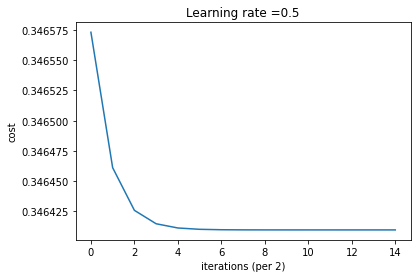

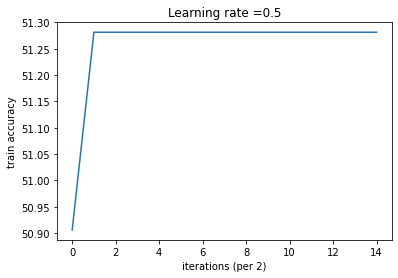

In [ ]:
# Print training progess and show loss graph
layers_dims = [dm,600 ,256, 256, 64,2] 
parameters1  = L_layer_model(train_set_x, train_set_y_onehot, layers_dims,learning_rate = 0.5, num_iterations =30 , print_cost = True,num_print=2, activation_func='relu',activ_out='softmax')

In [ ]:
acc_test = accuracy(test_set_x, parameters1, test_set_y_onehot, activation_fn="relu",activ_out='softmax')
acc_train = accuracy(train_set_x, parameters1, train_set_y_onehot, activation_fn="relu",activ_out='softmax')
print(f'test : {acc_test}')
print(f'train : {acc_train}')
# print((np.exp(test_set_y_onehot[0:1,:]-np.max(test_set_y_onehot[0:1,:])))/ (np.exp(test_set_y_onehot[0:1,:]-np.max(test_set_y_onehot[0:1,:]))).sum(axis=1, keepdims=True))

test : 49.375
train : 51.28125


**size = 3,64,64**

**activation function for output : sigmoid**

**activation function for hidden layer : relu**

**number of layer = 7**


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


Cost after iteration 0: 0.693147
Cost after iteration 2: 0.693011
Cost after iteration 4: 0.692931
Cost after iteration 6: 0.692885
Cost after iteration 8: 0.692857
Cost after iteration 10: 0.692841
Cost after iteration 12: 0.692832
Cost after iteration 14: 0.692827
Cost after iteration 16: 0.692824
Cost after iteration 18: 0.692822
Cost after iteration 20: 0.692821
Cost after iteration 22: 0.692820
Cost after iteration 24: 0.692820
Cost after iteration 26: 0.692819
Cost after iteration 28: 0.692819



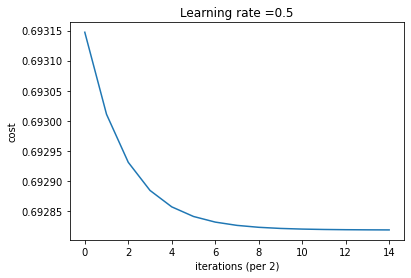

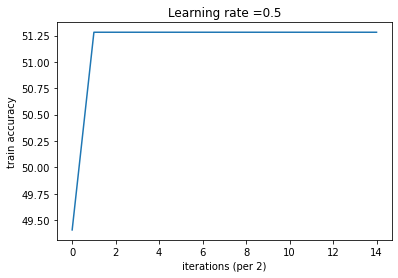

In [ ]:
# Print training progess and show loss graph
layers_dims = [dm,600 ,256, 256, 64,1] 
parameters2  = L_layer_model(train_set_x, train_set_y, layers_dims,learning_rate = 0.5, num_iterations =30 , print_cost = True,num_print=2, activation_func='relu',activ_out='sigmoid')

In [ ]:
acc_test = accuracy(test_set_x, parameters2, test_set_y, activation_fn="relu",activ_out='sigmoid')
acc_train = accuracy(train_set_x, parameters2, train_set_y, activation_fn="relu",activ_out='sigmoid')
print(f'test : {acc_test}')
print(f'train : {acc_train}')

test : 49.375
train : 51.28125


# compare different number of layers

In [ ]:
# Print training progess and show loss graph
layers_dims = [dm,3000 ,1000, 64,64,10,1] 
parameters4  = L_layer_model(train_set_x, train_set_y, layers_dims,learning_rate = 0.6, num_iterations =100 , print_cost = True,num_print=5, activation_func='leaky',activ_out='sigmoid')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


Cost after iteration 0: 0.693147


KeyboardInterrupt: ignored

In [ ]:
acc_test = accuracy(test_set_x, parameters4, test_set_y, activation_fn="relu",activ_out='sigmoid',activ_out='sigmoid')
acc_train = accuracy(train_set_x, parameters4, train_set_y, activation_fn="relu",activ_out='sigmoid',activ_out='sigmoid')
print(f'test : {acc_test}')
print(f'train : {acc_train}')

# compare different size of inputs 

**(3,64,64)**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


Cost after iteration 0: 0.693148
Cost after iteration 10: 0.693102
Cost after iteration 20: 0.693062



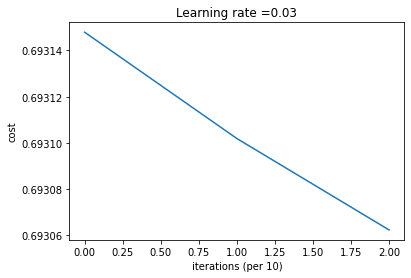

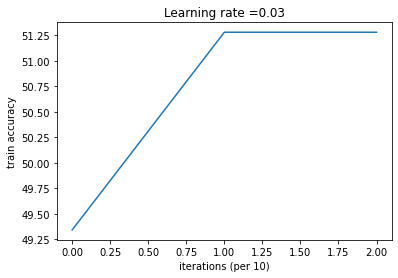

In [ ]:
# 64*64*3
layers_dims = [dm, 128, 64, 10,1] #  4-layer model
parameters2 = L_layer_model(train_set_x, train_set_y, layers_dims,learning_rate = 0.03, num_iterations = 30, print_cost = True,num_print=10, activation_func='relu')

In [ ]:
acc_test = accuracy(test_set_x, parameters2, test_set_y_arr, activation_fn="relu",activ_out='sigmoid')
acc_train = accuracy(train_set_x, parameters2, train_set_y, activation_fn="relu",activ_out='sigmoid')
print(f'test : {acc_test}')
print(f'train : {acc_train}')

test : 49.375
train : 51.28125


**(3,128,128)**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


Cost after iteration 0: 0.693149
Cost after iteration 10: 0.693054
Cost after iteration 20: 0.692972



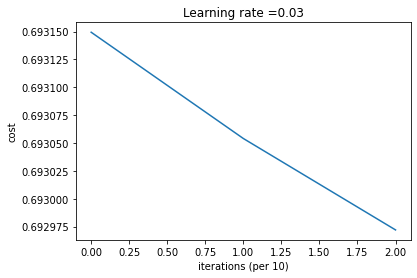

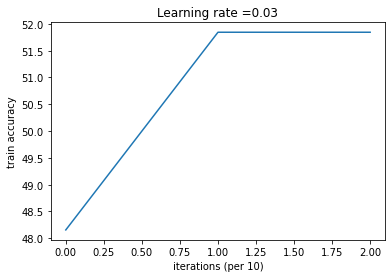

In [ ]:
# 128*128*3
dm = train_set_x.shape[0]
layers_dims = [dm, 128, 64, 10,1] #  4-layer model
parameters3 = L_layer_model(train_set_x, train_set_y, layers_dims,learning_rate = 0.03, num_iterations = 30, print_cost = True,num_print=10, activation_func='relu')

In [ ]:
acc_test = accuracy(test_set_x, parameters3, test_set_y, activation_fn="relu",activ_out='sigmoid')
acc_train = accuracy(train_set_x, parameters3, train_set_y, activation_fn="relu",activ_out='sigmoid')
print(f'test : {acc_test}')
print(f'train : {acc_train}')

test : 48.90625
train : 51.84375


***result:***

**according to costs that are printed, final accuracy for both test and train dataset, slop of cost function seems 128,128 is better than 64,64 but we test on small iteration more than this value will be better for both of them**

# compare different learning rate

**[0.1, 0.01, 0.001, 0.0001]**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


Cost after iteration 0: 0.693148
Cost after iteration 2: 0.693116
Cost after iteration 4: 0.693087
Cost after iteration 6: 0.693062
Cost after iteration 8: 0.693038
Cost after iteration 10: 0.693017
Cost after iteration 12: 0.692998
Cost after iteration 14: 0.692981
Cost after iteration 16: 0.692965
Cost after iteration 18: 0.692951



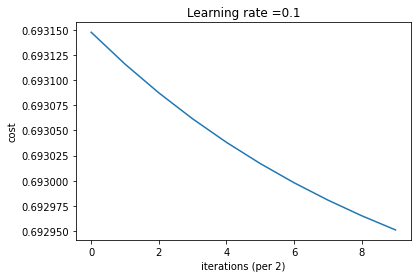

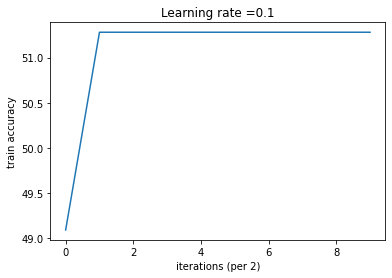

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


Cost after iteration 0: 0.693148
Cost after iteration 2: 0.693144
Cost after iteration 4: 0.693141
Cost after iteration 6: 0.693138
Cost after iteration 8: 0.693135
Cost after iteration 10: 0.693132
Cost after iteration 12: 0.693128
Cost after iteration 14: 0.693125
Cost after iteration 16: 0.693122
Cost after iteration 18: 0.693119



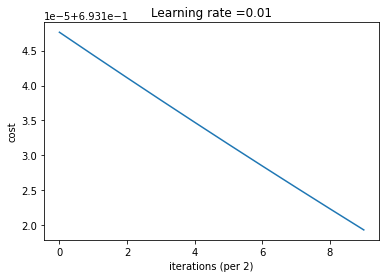

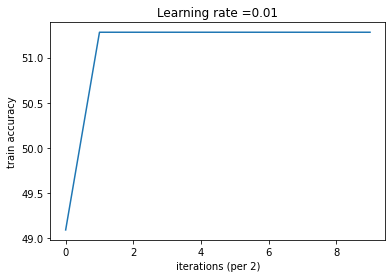

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


Cost after iteration 0: 0.693148
Cost after iteration 2: 0.693147
Cost after iteration 4: 0.693147
Cost after iteration 6: 0.693147
Cost after iteration 8: 0.693146
Cost after iteration 10: 0.693146
Cost after iteration 12: 0.693146
Cost after iteration 14: 0.693145
Cost after iteration 16: 0.693145
Cost after iteration 18: 0.693145



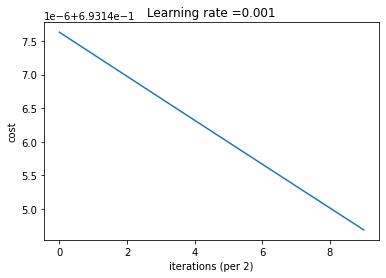

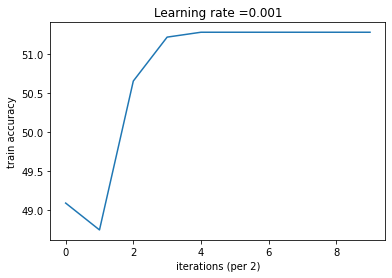

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


Cost after iteration 0: 0.693148
Cost after iteration 2: 0.693148
Cost after iteration 4: 0.693148
Cost after iteration 6: 0.693148
Cost after iteration 8: 0.693147
Cost after iteration 10: 0.693147
Cost after iteration 12: 0.693147
Cost after iteration 14: 0.693147
Cost after iteration 16: 0.693147
Cost after iteration 18: 0.693147



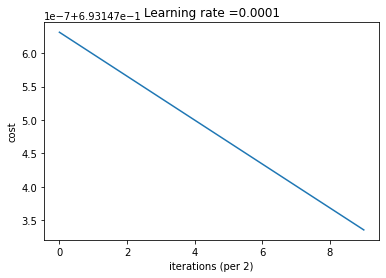

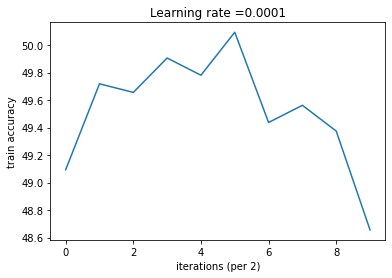

In [ ]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]
layers_dims = [dm, 64, 32, 16, 8,4,1] #  4-layer model
acc_trains = []
acc_tests = []
for lr in learning_rates:
  # Print training progess and show loss graph
  layers_dims = [dm,200 ,256, 256, 64,1] 
  parameters  = L_layer_model(train_set_x, train_set_y, layers_dims,learning_rate = lr, num_iterations =20 , print_cost = True,num_print=2, activation_func='relu',activ_out='sigmoid')
  # acc_test = accuracy(test_set_x, parameters, test_set_y, activation_fn="relu",activ_out='sigmoid')
  acc_tests.append(acc_test)
  acc_train = accuracy(train_set_x, parameters, train_set_y, activation_fn="relu",activ_out='sigmoid')
  acc_trains.append(acc_train)

In [ ]:
acc_trains

[51.28125, 51.28125, 51.28125, 48.75]